In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os

print("Current directory:", os.getcwd())  
print("Files in directory:", os.listdir())  

Current directory: /Users/quinnoconnor/Desktop/VSCode Python/DS311 - Recreation
Files in directory: ['re:remix.ipynb', 'remix.ipynb', '.DS_Store', 'In-Class Graphs.ipynb', 'interactivity_activityboard', 'Untitled-1.py', 'Data']


In [3]:
df_new = pd.read_csv("Data/per-capita-meat-type.csv")


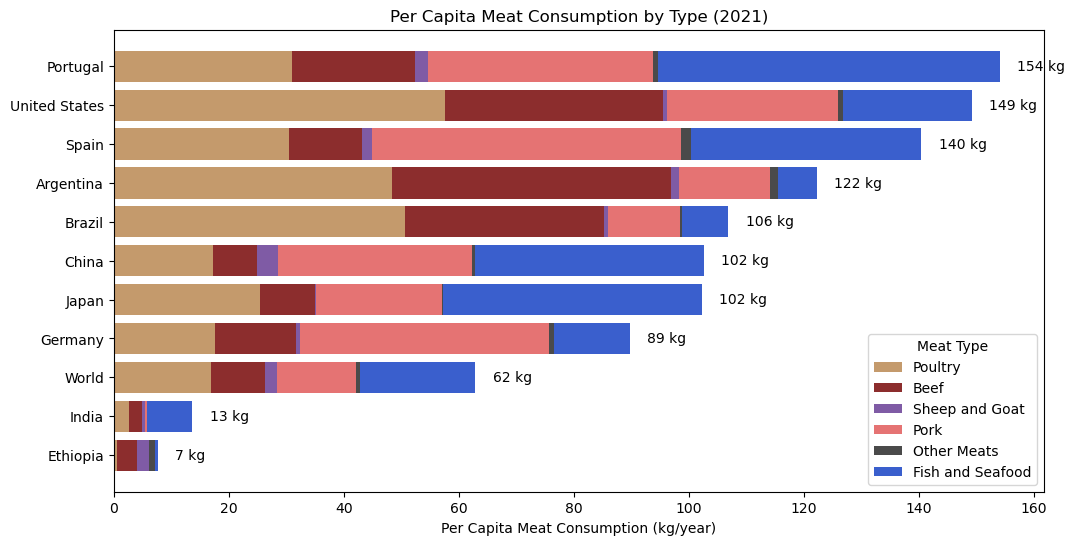

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

##Import the csv and select the columns I want to use
df_new = pd.read_csv('Data/per-capita-meat-type.csv')
df_new.columns = [
    "Country", "Code", "Year", "Poultry", "Beef", "Sheep and Goat", "Pork", "Other Meats", "Fish and Seafood"
]

latest_year = df_new["Year"].max()
df_latest = df_new[df_new["Year"] == latest_year]

selected_countries = [
    "Portugal", "United States", "Spain", "Argentina", "Brazil", 
    "China", "Japan", "Germany", "World", "India", "Ethiopia"
]

df_selected = df_latest[df_latest["Country"].isin(selected_countries)].copy()

df_selected["Total"] = df_selected[["Poultry", "Beef", "Sheep and Goat", "Pork", "Other Meats", "Fish and Seafood"]].sum(axis=1)
df_selected = df_selected.sort_values(by="Total", ascending=True)


##Take color keys from orginal horizontal barchart to keep the same colors on the recreation
colors = {
    "Poultry": "#C49A6C",
    "Beef": "#8C2D2D",
    "Sheep and Goat": "#7F5BA5",
    "Pork": "#E57373",
    "Other Meats": "#4A4A4A",
    "Fish and Seafood": "#3A5FCD"
}

categories = ["Poultry", "Beef", "Sheep and Goat", "Pork", "Other Meats", "Fish and Seafood"]

fig, ax = plt.subplots(figsize=(12, 6))
y_positions = np.arange(len(df_selected))

bottom = np.zeros(len(df_selected))
for category in categories:
    values = df_selected[category].fillna(0)
    ax.barh(df_selected["Country"], values, left=bottom, color=colors[category], label=category)
    bottom += values
##Adds annotations (kg) for each bar
for i, total in enumerate(df_selected["Total"]):
    ax.text(total + 3, y_positions[i], f"{int(total)} kg", va="center", fontsize=10)

ax.set_xlabel("Per Capita Meat Consumption (kg/year)")
ax.set_title(f"Per Capita Meat Consumption by Type ({latest_year})")
ax.legend(title="Meat Type", loc="lower right")

plt.show()


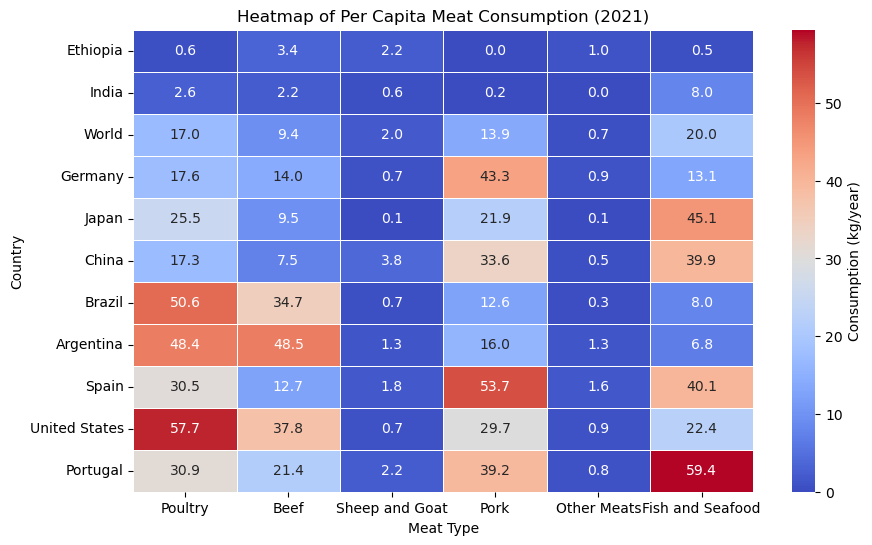

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

##Pick coloumns 
meat_columns = ["Poultry", "Beef", "Sheep and Goat", "Pork", "Other Meats", "Fish and Seafood"]
df_heatmap = df_selected.set_index("Country")[meat_columns]

plt.figure(figsize=(10, 6))
ax = sns.heatmap(df_heatmap, annot=True, fmt=".1f", cmap="coolwarm", linewidths=0.5, annot_kws={"size": 10})

#Axes/titles
plt.title(f"Heatmap of Per Capita Meat Consumption ({latest_year})")
plt.xlabel("Meat Type")
plt.ylabel("Country")
cbar = ax.collections[0].colorbar
cbar.set_label('Consumption (kg/year)')

plt.show()



In [21]:
df_new = pd.read_csv("Data/Feb10.csv")

In [22]:
df_new.head()

,unitid,institution name,year,HD2023.Degree-granting status,"DRVGR2023.Graduation rate, total cohort","DRVIC2023.Tuition and fees, 2020-21","DRVIC2023.Tuition and fees, 2021-22","DRVIC2023.Tuition and fees, 2022-23","DRVIC2023.Tuition and fees, 2023-24","EF2023D.Full-time retention rate, 2023",...,DRVEF2023.Percent of graduate enrollment that are Race/ethnicity unknown,DRVEF2023.Percent of graduate enrollment that are U.S. Nonresident,DRVEF2023.Percent of graduate enrollment that are Asian/Native Hawaiian/Pacific Islander,DRVEF2023.Percent of graduate enrollment that are women,"DRVGR2023.Graduation rate, total cohort.1","DRVGR2023.Graduation rate, men","DRVGR2023.Graduation rate, women",SFA2223.Percent of full-time first-time undergraduates awarded any financial aid,"SFA2223.Percent of full-time first-time undergraduates awarded federal, state, local or institutional grant aid","SFA2223.Average amount of federal, state, local or institutional grant aid awarded"
0,162928,Johns Hopkins University,2023,Degree-granting,95,54660,59220,60980,63340,98,...,2.0,28.0,13.0,52.0,95,94,95,67,60,58456
1,164216,Washington College,2023,Degree-granting,74,48214,49768,52481,54356,87,...,NaN,NaN,NaN,NaN,74,72,76,100,98,36593
2,164270,McDaniel College,2023,Degree-granting,64,46851,47311,46800,49647,79,...,3.0,17.0,2.0,75.0,64,57,71,100,100,39979
3,212009,Dickinson College,2023,Degree-granting,83,56523,58733,61351,63475,89,...,15.0,15.0,0.0,23.0,83,79,87,95,94,40209
4,212577,Franklin and Marshall College,2023,Degree-granting,86,61062,63406,65844,68380,85,...,NaN,NaN,NaN,NaN,86,85,87,71,68,45764
